In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error

region_1 = pd.read_csv('E:/datasets/geo_data_0.csv')
region_2 = pd.read_csv('E:/datasets/geo_data_1.csv')
region_3 = pd.read_csv('E:/datasets/geo_data_2.csv')

In [ ]:
# Region 1
print(region_1.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [108]:
print("Region 1: \n", region_1.describe())

Region 1: 
                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347


In [106]:
# Region 2
print(region_2.head())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [109]:
print("Region 2: \n", region_2.describe())

Region 2: 
                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408


In [107]:
# Region 3
print(region_3.head())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [110]:
print("Region 3: \n", region_3.describe())

Region 3: 
                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838


In [96]:
print(region_1['id'].duplicated().sum())
print(region_2['id'].duplicated().sum())
print(region_3['id'].duplicated().sum())

10
4
4


In [93]:
print(region_1.isna().sum())
print()
print(region_2.isna().sum())
print()
print(region_3.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [6]:
region_1_columns = list(region_1.columns.drop(['id']))
#region_1_columns = list(region_1.columns)[1:]

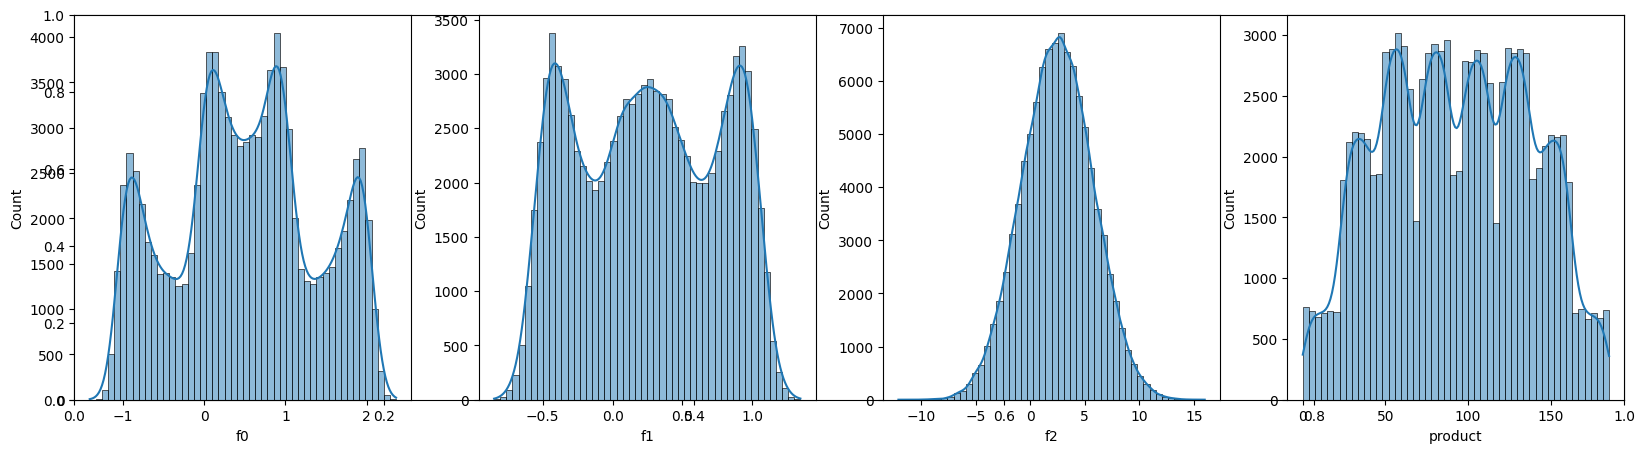

In [7]:
plt.subplots(figsize=(20, 5))

for i in range(len(region_1_columns)):
    sns.histplot(data=region_1, x=region_1_columns[i], ax=plt.subplot(1, len(region_1_columns), i+1), bins=50, kde=True,)
    #plt.xticks(rotation=45)
    

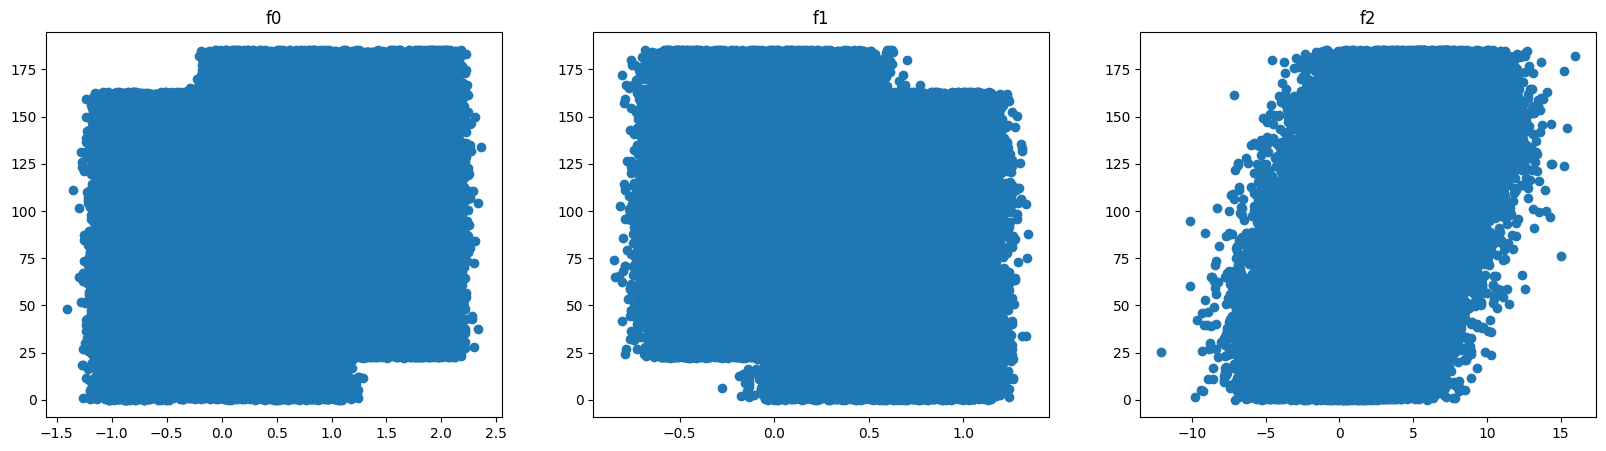

In [8]:
fig, ax = plt.subplots(1, len(region_1_columns)-1, figsize=(20, 5))

for i in range(0, len(region_1_columns)-1):
    ax[i].scatter(region_1[region_1_columns[i]], region_1[region_1_columns[-1]])
    ax[i].title.set_text(region_1_columns[i])

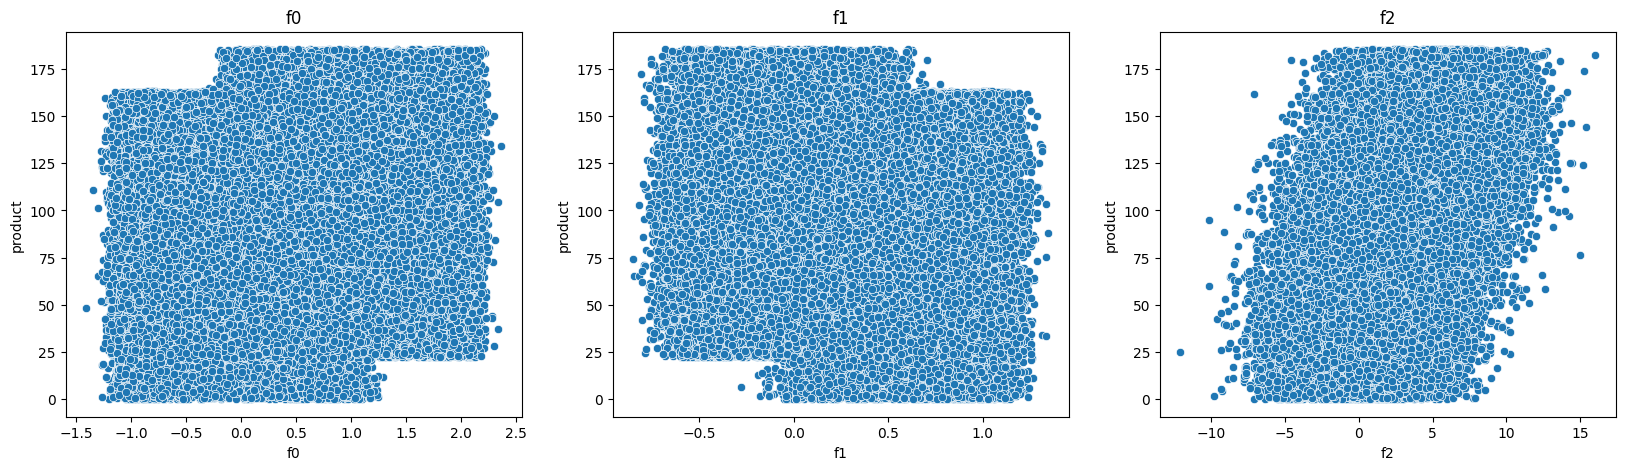

In [9]:
fig, ax = plt.subplots(1, len(region_1_columns)-1, figsize=(20, 5))

for col, axis in zip(region_1_columns[:-1], ax):
    sns.scatterplot(x=region_1[col], y=region_1[region_1_columns[-1]], ax=axis)
    axis.set_title(col)

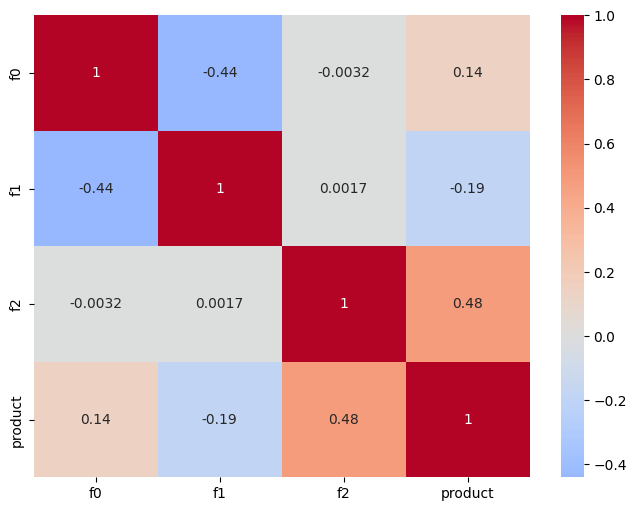

In [10]:
corr = region_1[region_1_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()

#### Regresion lineal para la region 1

In [11]:
region_1.drop(columns=['id'], inplace=True)

In [12]:
target = region_1['product']
features = region_1.drop(['product'], axis=1)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
model.score(x_train, y_train)

0.277275704250017

In [17]:
model.score(x_test, y_test)

0.2709341205776745

In [18]:
print(model.predict(x_test)[:10])

[106.00976111  78.79677414  87.25561646 149.83595605 103.60947558
 146.45615599 122.29821558  90.65042536  73.12393743  81.35724343]


In [19]:
print(y_test[:10].values)

[ 31.63714731  71.66763655  63.72002381 132.01596034 138.24753853
 155.40976059 145.72019472  81.5294478  103.42270544  81.74016698]


In [20]:
#RSME

root_mean_squared_error(y_test, model.predict(x_test))

37.7134938608286

#### Arbol de decision

In [27]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=100)

In [22]:
model_tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,100
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
model_tree.score(x_train, y_train)

0.30181026785124343

In [24]:
model_tree.score(x_test, y_test)

0.281093991603074

In [25]:
root_mean_squared_error(y_test, model_tree.predict(x_test))

37.44979443380351

#### Bosque aleatorio

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(n_estimators=50, max_depth=50, max_leaf_nodes=100, max_features='sqrt', random_state=42)

In [37]:
model_forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,100
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
model_forest.score(x_train, y_train)

0.30108436298068153

In [39]:
model_forest.score(x_test, y_test)

0.28126613984575066

In [40]:
root_mean_squared_error(y_test, model_forest.predict(x_test))

37.44531032724875

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [1, 5, 10, 20],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [50]:
grid = GridSearchCV(estimator=model_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=True)

In [51]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\Roberto Carlos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Roberto Carlos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Roberto Carlos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['auto', 'sqrt', ...], 'n_estimators': [1, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,20


In [54]:
print("Los mejores parametros son:", grid.best_params_)

Los mejores parametros son: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}


In [56]:
grid.score(x_test, y_test)

0.28160951890526575

In [58]:
predict_forest = grid.predict(x_test)

In [63]:
math.sqrt(mean_squared_error(y_test, predict_forest))

37.43636440702663

In [64]:
root_mean_squared_error(y_test, predict_forest)

37.43636440702663

In [112]:
resultado_mejor_bosque = pd.DataFrame({'real_value': y_test, 'predict_value': predict_forest})

In [65]:
### Analisis de negocio

In [74]:
presupuesto = 100_000_000
pozos = 200
ganancia_por_unidad = 4500

costo_pozo = presupuesto / pozos
print("El costo por pozo es de:", costo_pozo)

El costo por pozo es de: 500000.0


In [81]:
unidades_min = presupuesto / ganancia_por_unidad
unidad = 1000

print(f"El volumen minimo para no perder dinero es de: {unidades_min*unidad:,.0f} barriles")

El volumen minimo para no perder dinero es de: 22,222,222 barriles


In [87]:
numero_min_por_pozo = unidades_min / pozos
print(f"El volumen minimo por pozo para no perder dinero es de: {numero_min_por_pozo*unidad:,.2f} barriles")

El volumen minimo por pozo para no perder dinero es de: 111,111.11 barriles


In [114]:
def beneficio(datos):
    mejores_pozos = datos.sort_values(by='predict_value', ascending=False)['real_value'].head(200)
    volumen = mejores_pozos.sum()
    margen = volumen * ganancia_por_unidad - presupuesto
    return margen

In [120]:
print("El margen de ganancia con bosque aleatorio para la region 1 es de", beneficio(resultado_mejor_bosque))

El margen de ganancia con bosque aleatorio para la region 1 es de 32557811.99950035


In [116]:
resultado_mejor_bosque

,real_value,predict_value
42329,31.637147,99.079424
74250,71.667637,71.244914
68319,63.720024,89.714128
58104,132.015960,136.137257
8713,138.247539,95.381471
...,...,...
99469,135.007181,125.832163
21575,9.416630,68.965389
98902,106.294183,89.317475
14611,53.491254,106.581276


In [121]:
def estres(datos, n_muestras):

    margen_muestras = []

    for i in range(n_muestras):
        mejores = datos.sample(500, replace=True)
        margen_muestras.append(beneficio(mejores))
        
    return pd.Series(margen_muestras)

In [123]:
resultado = estres(resultado_mejor_bosque, 1000)

In [124]:
resultado

0      1.294010e+07
1      6.940628e+06
2      2.607125e+05
3      3.083975e+06
4      5.271395e+06
           ...     
995    2.722146e+06
996    1.480888e+06
997    6.414038e+06
998    3.922510e+06
999    3.474309e+06
Length: 1000, dtype: float64

In [125]:
resultado.mean()

np.float64(4389507.519813633)

In [126]:
(resultado < 0).mean()

np.float64(0.048)

In [127]:
(resultado < 0).sum()

np.int64(48)